In [2]:
%pwd

'/Users/peiboxu/Documents/mbp2016_backup/MERGE-seq/elife/figures_elife_revision/elife_revision/code_file'

In [9]:
#Run the below code in your notebook to check the installed version
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
plt.rcParams['pdf.fonttype'] = 'truetype'
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('../results/fig6_var100_MD_valid_binary_normdata_allcells.csv')

In [11]:
df.head()

,Cplx3,Tshz2,Npy,Myl4,Pbld1,Ptgs2,Dlk1,Gm13889,Cck,Lypd1,...,Gapdh,Gm40518,Rgs4,Sostdc1,Ier2,Timp2,Gm26772,Lpl,P2rx4,binary
0,0.0,0.000000,0.000000,1.736971,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.764011,2.541624,2.981657,0.0,0.000000,1.736971,0.0,0.000000,1.736971,0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,2.038546,...,5.011794,2.293131,2.293131,0.0,2.495878,1.696158,0.0,0.000000,0.000000,0
2,0.0,0.000000,3.035425,0.000000,0.0,0.0,0.0,0.0,5.236935,0.000000,...,3.311021,0.000000,1.163492,0.0,0.000000,3.035425,0.0,2.028579,0.000000,0
3,0.0,4.304573,1.577758,4.004004,0.0,0.0,0.0,0.0,0.000000,4.355191,...,4.135252,0.000000,3.006693,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.518209,...,4.928816,2.835458,2.293556,0.0,2.724985,2.293556,0.0,0.000000,0.000000,0


In [12]:
df['binary'].value_counts()

0    7649
1     561
Name: binary, dtype: int64

In [13]:
exp1 = setup(df, target = 'binary',session_id=1,index=False,n_jobs=4)

,Description,Value
0,Session id,1
1,Target,binary
2,Target type,Binary
3,Original data shape,"(8210, 101)"
4,Transformed data shape,"(8210, 101)"
5,Transformed train set shape,"(5747, 101)"
6,Transformed test set shape,"(2463, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


In [14]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4974,0.7304,0.8974,0.1094,0.1950,0.0843,0.1851
1,0.4904,0.6689,0.8205,0.1006,0.1793,0.0665,0.1451
2,0.4835,0.6527,0.7692,0.0943,0.1681,0.0537,0.1173
3,0.5061,0.7348,0.8462,0.1061,0.1886,0.0774,0.1652
4,0.5200,0.7633,0.9000,0.1169,0.2069,0.0955,0.1998
5,0.4991,0.7214,0.8250,0.1051,0.1864,0.0719,0.1532
6,0.5009,0.7338,0.9250,0.1153,0.2050,0.0927,0.2019
7,0.4878,0.7471,0.8718,0.1053,0.1878,0.0758,0.1682
8,0.4861,0.7277,0.8974,0.1074,0.1918,0.0801,0.1796


In [36]:
Xtest = get_config('X_test')
ytest = get_config('y_test')
X_train = get_config('X_train')
y_train = get_config('y_train')
sample_size=1500
sub_sampled_train_data = shap.sample(X_train, sample_size, random_state=0)
sub_sampled_test_data = shap.sample(Xtest, sample_size, random_state=0)
explainer = shap.KernelExplainer(nb.predict, sub_sampled_train_data)## nb,predict_proba generates barplot

Using 1500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [28]:
shap_values = explainer.shap_values(sub_sampled_test_data)

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
np.save("md_shap_values_allcells.npy", shap_values)
#pd.DataFrame(shap_values).to_csv("lh_shap_values_500cells.csv")

In [34]:
shap_values = np.load("../results/fig6_md_shap_values_1500cells.npy")


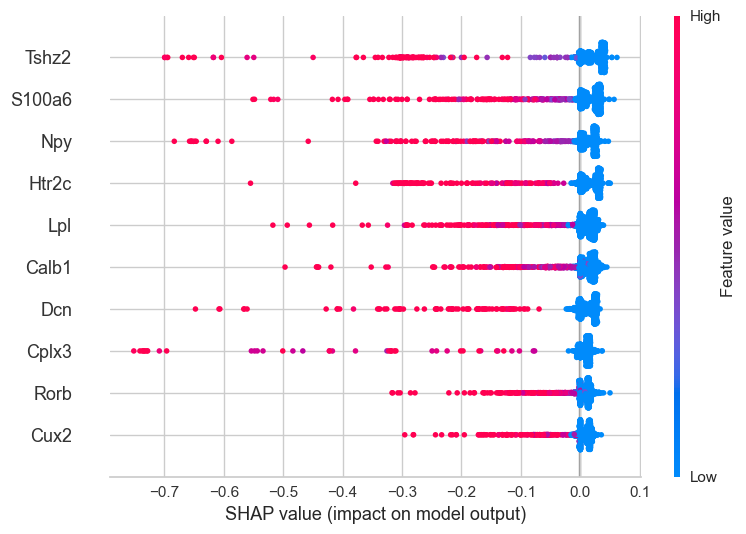

In [37]:
shap.summary_plot(shap_values, sub_sampled_test_data,show=False, max_display=10)
#plt.savefig("MD var shap plot nb .pdf",dpi=1000)

In [30]:
shap_values

array([[ 0.00201556,  0.01011577,  0.00663179, ...,  0.        ,
        -0.0880685 ,  0.00467625],
       [ 0.01985866,  0.06619694,  0.02574062, ...,  0.00605513,
         0.0198117 ,  0.00073607],
       [ 0.02321017,  0.06703187,  0.02716427, ...,  0.0079114 ,
         0.02215542,  0.        ],
       ...,
       [ 0.        ,  0.03397659,  0.01105827, ...,  0.00613375,
         0.00446508,  0.00398956],
       [ 0.01695204,  0.06717311,  0.03276092, ...,  0.00688844,
         0.02630533,  0.        ],
       [ 0.01717507,  0.06752798,  0.02468552, ...,  0.00537243,
         0.02134609,  0.00055705]])

In [31]:
shap.plots.bar(shap_values)


AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

In [14]:
save_model(nb, model_name='model_MD_20220921')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='binary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='binary')),
                 ('fix_perfect', Remove_100(target='binary')),
                 ('clean_names', 